## FRAUD DETECTION

To predict if a particular transaction is fraud or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go

In [2]:
train = pd.read_csv('fraud_dataset.csv')

In [3]:
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
train.shape

(6362620, 11)

In [5]:
train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
train.drop_duplicates()

train.shape

(6362620, 11)

In [9]:
train.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
train.isFraud.unique()

array([0, 1], dtype=int64)

In [11]:
train.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### EXPLANATORY DATA ANALYSIS

In [12]:
train.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
s_train = train.sample(60000, random_state=42)

In [14]:
s_train = s_train.reset_index(drop=True)

In [15]:
print(s_train.shape)

(60000, 11)


In [16]:
s_train['isFraud'].value_counts(normalize=True)

0    0.998667
1    0.001333
Name: isFraud, dtype: float64

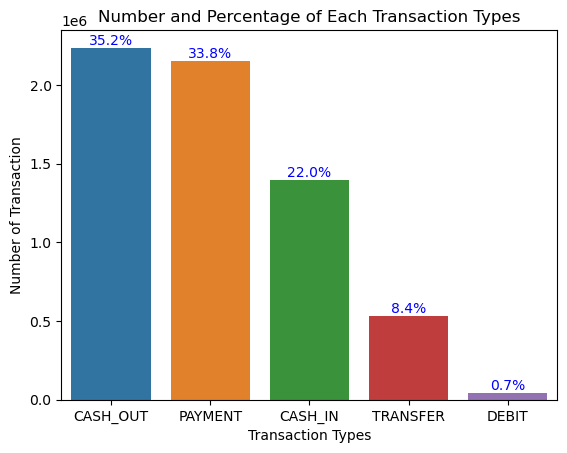

In [17]:
total = train.shape[0]
train_type = sns.countplot(x=train.type, order=train.type.value_counts().index)

for type in train_type.patches:
    percentage = '{:.1f}%'.format(100 * type.get_height() / total)
    x = type.get_x() + type.get_width() / 2
    y = type.get_height()
    
    train_type.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='blue')
    
plt.title("Number and Percentage of Each Transaction Types")
plt.xlabel('Transaction Types')
plt.ylabel('Number of Transaction')

plt.show()

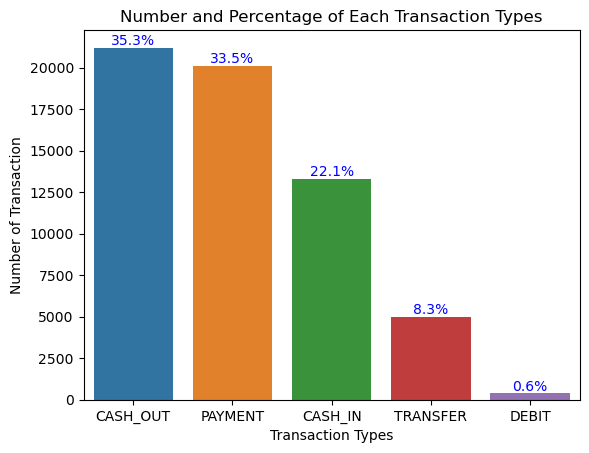

In [18]:
total = s_train.shape[0]
train_type = sns.countplot(x=s_train.type, order=s_train.type.value_counts().index)

for type in train_type.patches:
    percentage = '{:.1f}%'.format(100 * type.get_height() / total)
    x = type.get_x() + type.get_width() / 2
    y = type.get_height()
    
    train_type.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='blue')
    
plt.title("Number and Percentage of Each Transaction Types")
plt.xlabel('Transaction Types')
plt.ylabel('Number of Transaction')

plt.show()

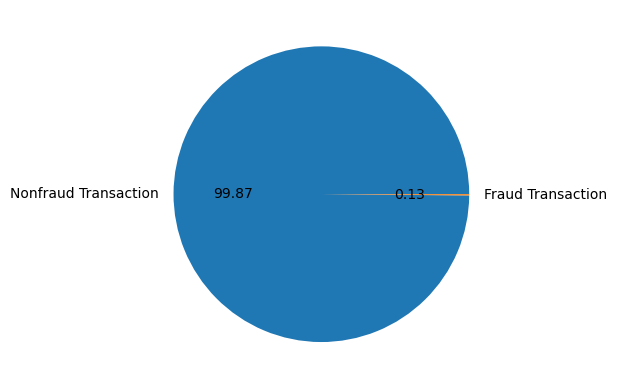

In [19]:
plt.pie(s_train['isFraud'].value_counts(), labels=['Nonfraud Transaction', 'Fraud Transaction'], autopct='%0.2f')

plt.show()

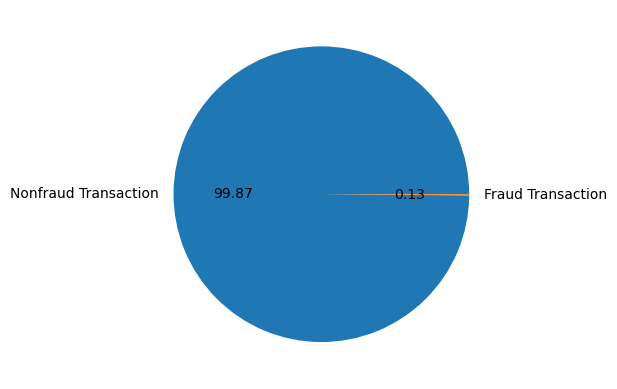

In [20]:
plt.pie(train['isFraud'].value_counts(), labels=['Nonfraud Transaction', 'Fraud Transaction'], autopct='%0.2f')

plt.show()

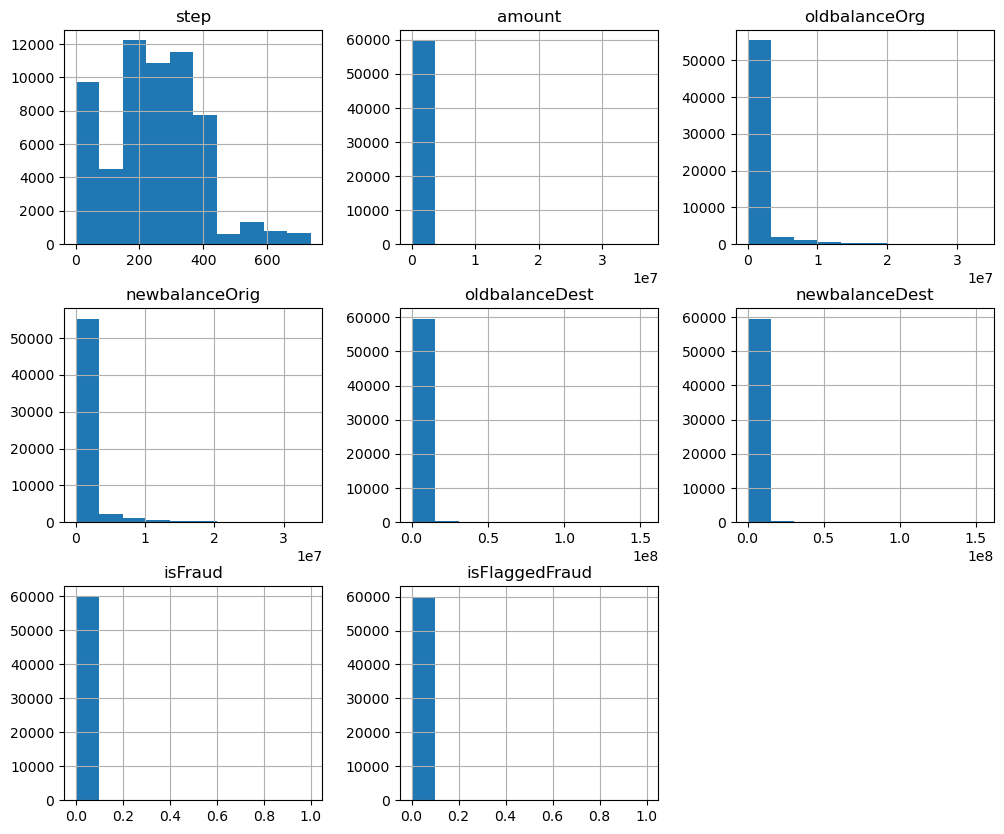

In [21]:
s_train.hist(figsize = (12,10))
plt.show()

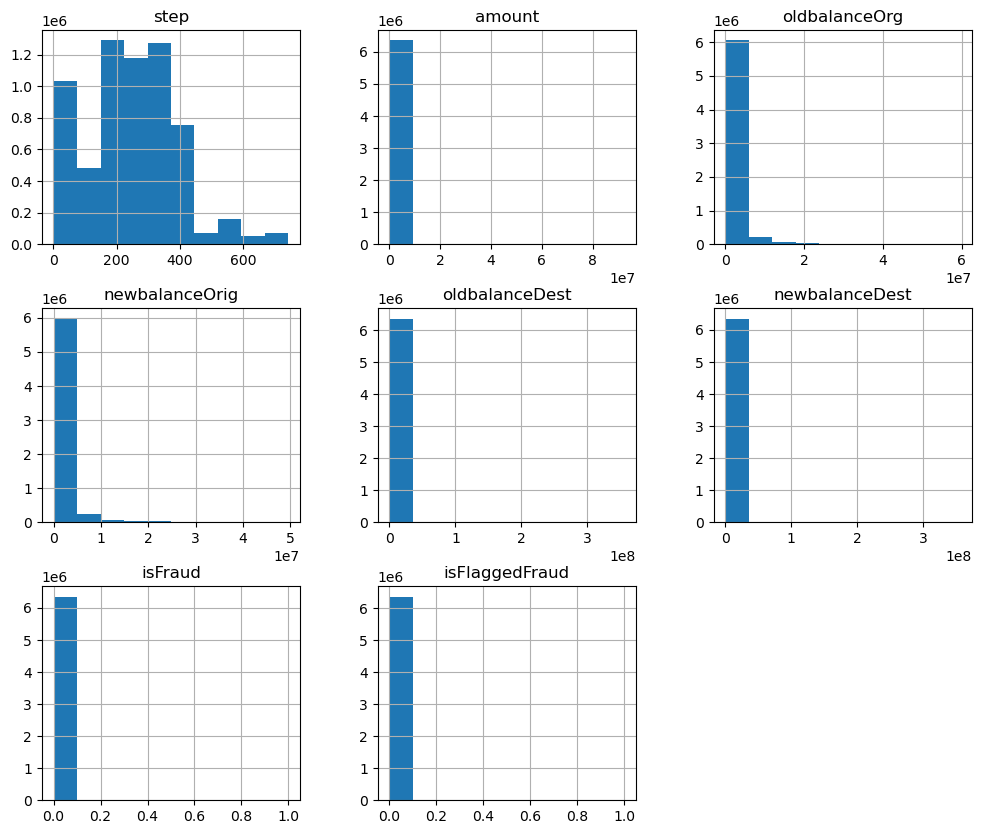

In [22]:
train.hist(figsize = (12,10))
plt.show()

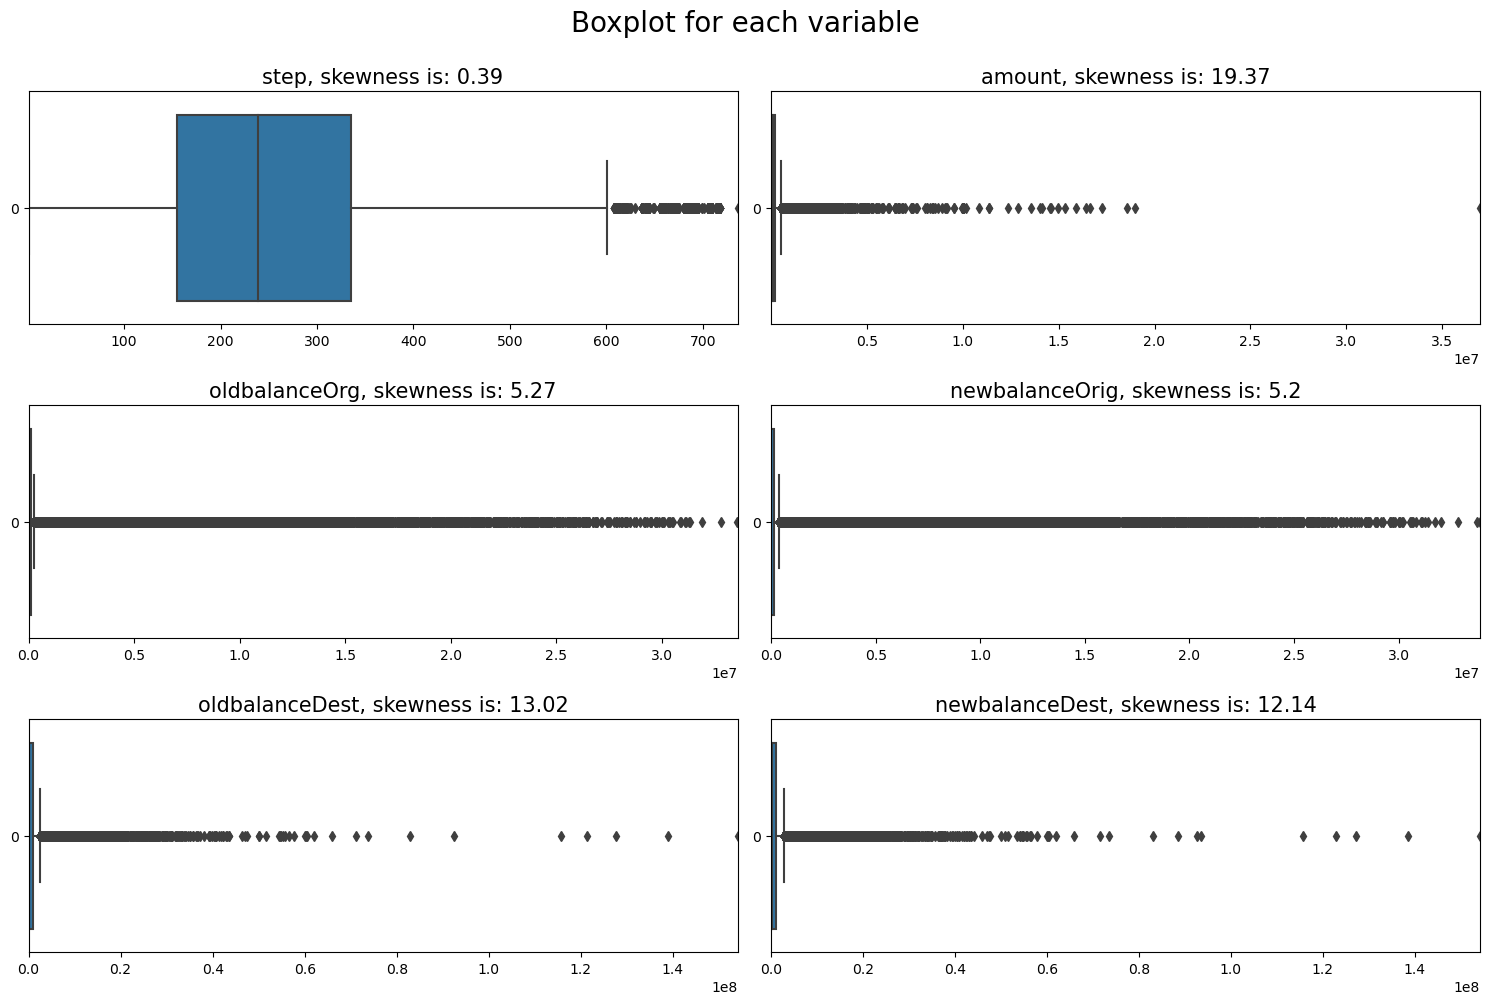

In [23]:
num_col = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

def s_train_boxplot(data,column):
    fig, ax = plt.subplots(3,2,figsize=(15,10))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
        
s_train_boxplot(data=s_train, column=num_col)
plt.tight_layout()

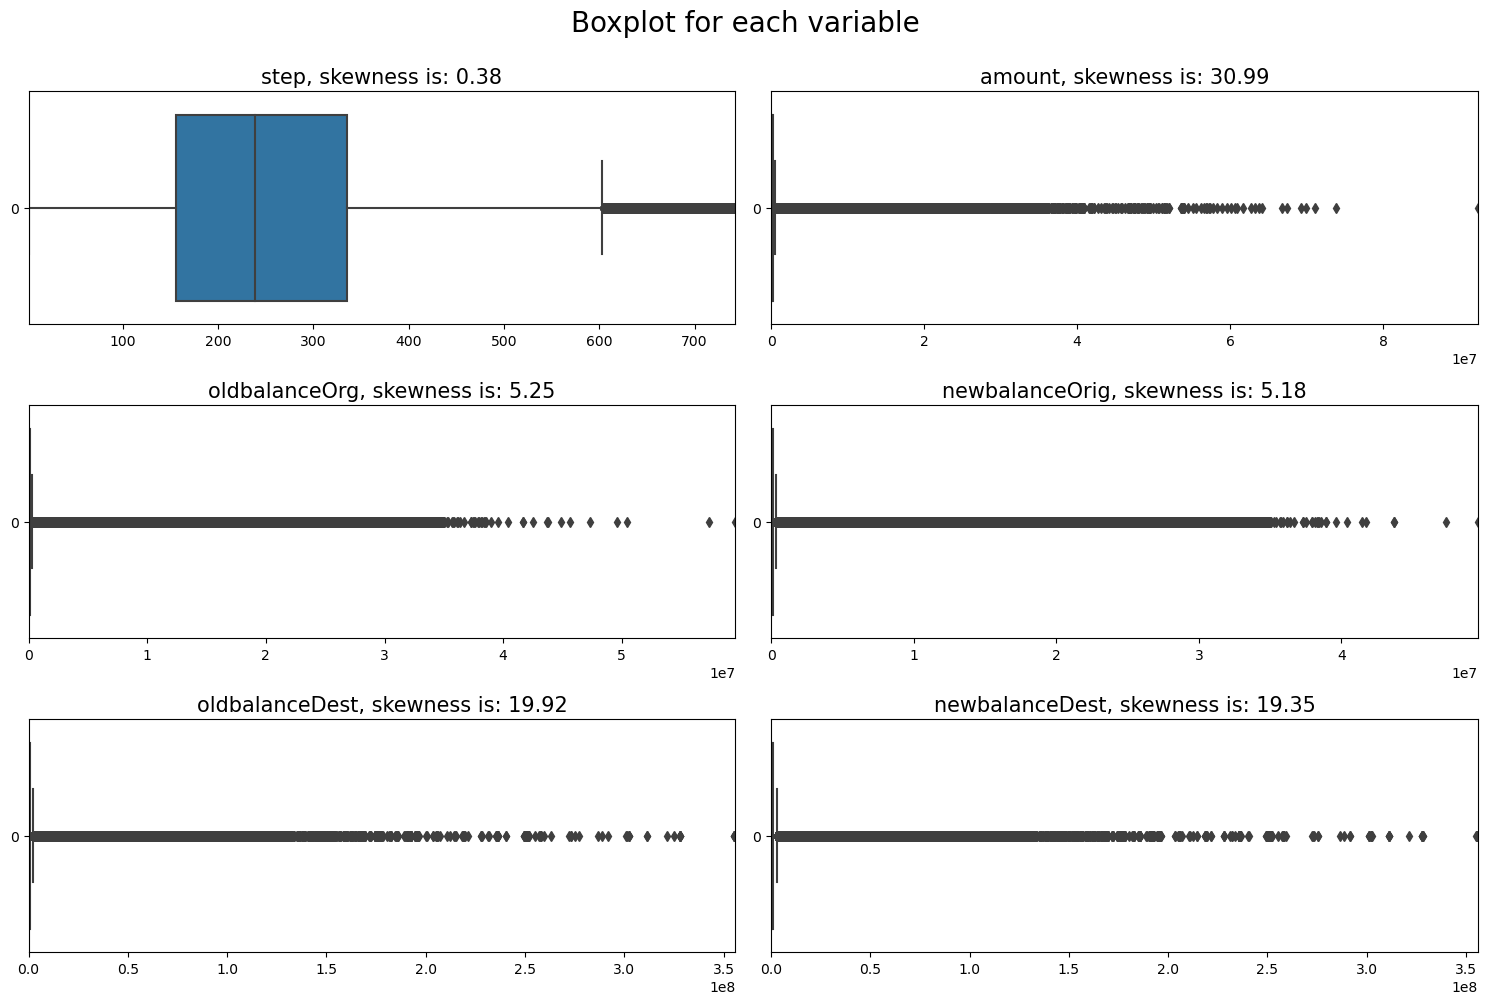

In [24]:
num_col = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

def train_boxplot(data,column):
    fig, ax = plt.subplots(3,2,figsize=(15,10))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
        
train_boxplot(data=train, column=num_col)
plt.tight_layout()

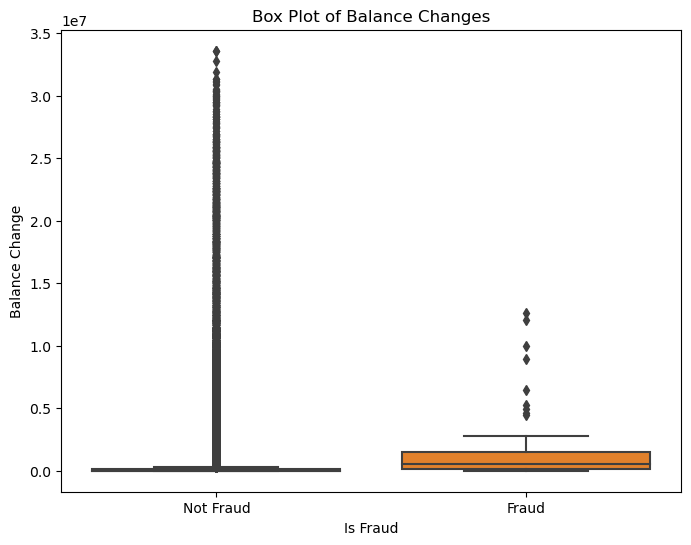

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=s_train)
plt.title('Box Plot of Balance Changes')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Change')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

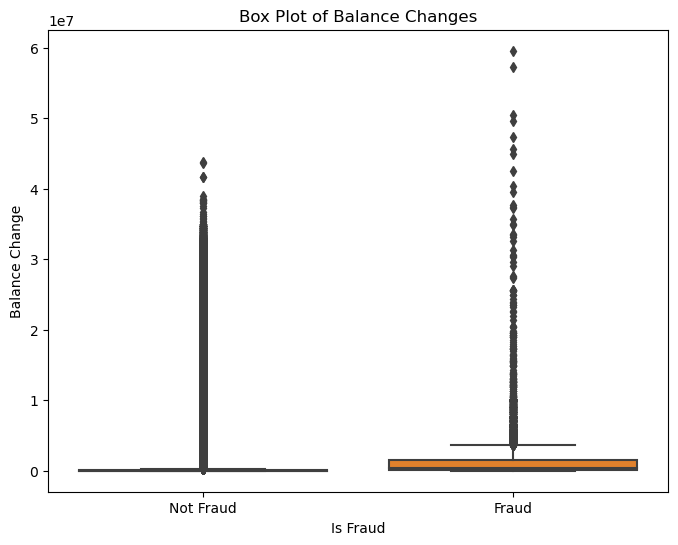

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=train)
plt.title('Box Plot of Balance Changes')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Change')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

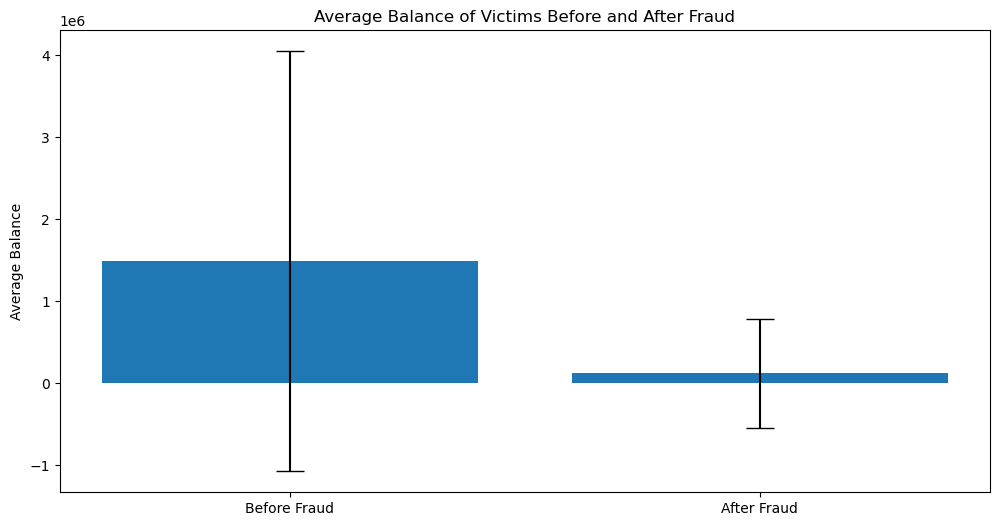

In [27]:
# Calculate average balances before and after fraud
avg_org_bal = s_train[s_train['isFraud'] == 1]['oldbalanceOrg'].mean()
avg_new_bal = s_train[s_train['isFraud'] == 1]['newbalanceOrig'].mean()

# Calculate standard deviations for error bars
std_org_bal = s_train[s_train['isFraud'] == 1]['oldbalanceOrg'].std()
std_new_bal = s_train[s_train['isFraud'] == 1]['newbalanceOrig'].std()

# Create a bar plot with error bars
plt.figure(figsize=(12, 6))
plt.bar(['Before Fraud', 'After Fraud'], [avg_org_bal, avg_new_bal], yerr=[std_org_bal, std_new_bal], capsize=10)
plt.title('Average Balance of Victims Before and After Fraud')
plt.ylabel('Average Balance')
plt.show()

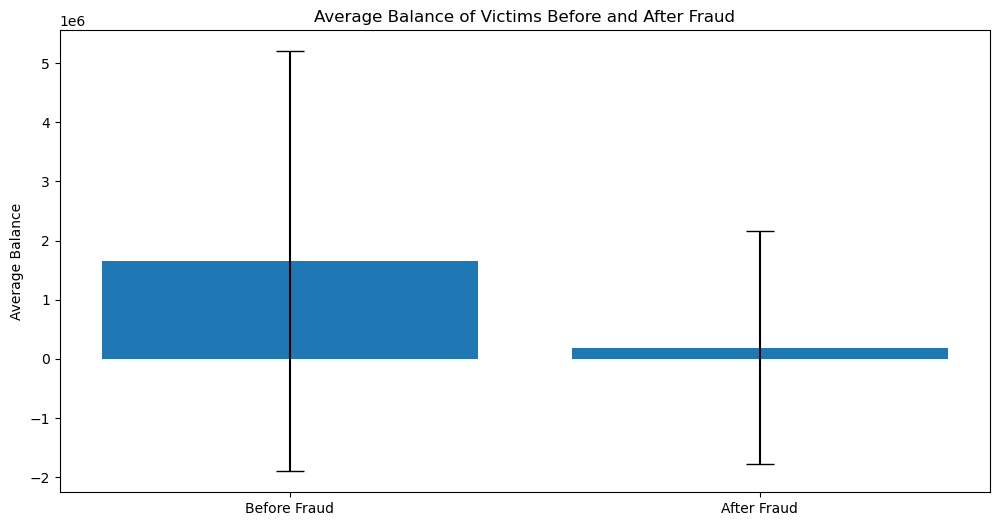

In [28]:
# Calculate average balances before and after fraud
avg_org_bal =train[train['isFraud'] == 1]['oldbalanceOrg'].mean()
avg_new_bal = train[train['isFraud'] == 1]['newbalanceOrig'].mean()

# Calculate standard deviations for error bars
std_org_bal = train[train['isFraud'] == 1]['oldbalanceOrg'].std()
std_new_bal = train[train['isFraud'] == 1]['newbalanceOrig'].std()

# Create a bar plot with error bars
plt.figure(figsize=(12, 6))
plt.bar(['Before Fraud', 'After Fraud'], [avg_org_bal, avg_new_bal], yerr=[std_org_bal, std_new_bal], capsize=10)
plt.title('Average Balance of Victims Before and After Fraud')
plt.ylabel('Average Balance')
plt.show()

<Axes: >

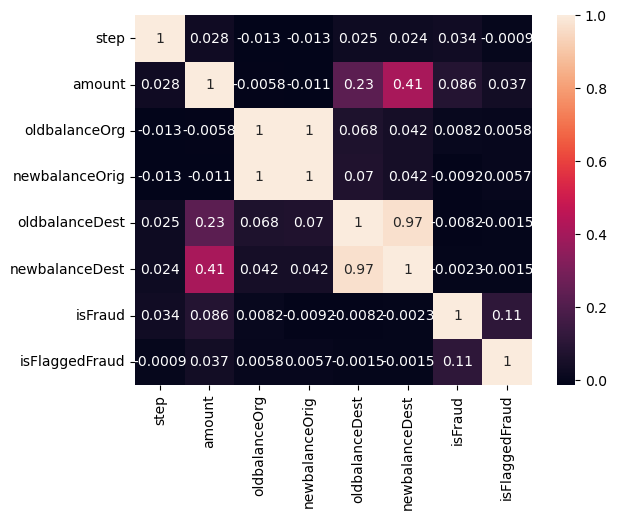

In [29]:
sns.heatmap(s_train.corr(), annot=True)

<Axes: >

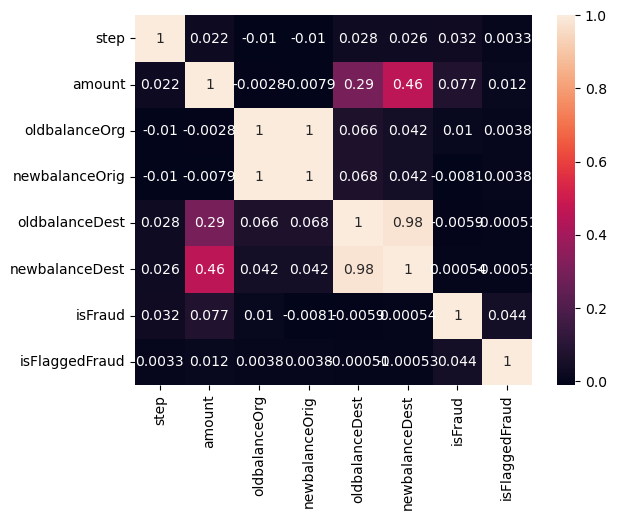

In [30]:
sns.heatmap(train.corr(), annot=True)

## MODELLING

In [31]:
s_train[s_train['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
283,683,CASH_OUT,93483.23,C1773649560,93483.23,0.00,C2085820540,86882.30,180365.53,1,0
420,294,CASH_OUT,806863.30,C747251675,806863.30,0.00,C1519845212,2344186.16,3151049.45,1,0
548,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.00,0.00,1,1
952,51,CASH_OUT,1170282.92,C555990868,1170282.92,0.00,C1318550066,173264.14,1343547.06,1,0
1816,133,CASH_OUT,1159010.44,C1724151856,1159010.44,0.00,C1229046559,175085.52,1334095.97,1,0
...,...,...,...,...,...,...,...,...,...,...,...
55441,261,TRANSFER,8639.93,C160052939,8639.93,0.00,C671509828,0.00,0.00,1,0
56135,401,CASH_OUT,4481768.26,C1705612559,4481768.26,0.00,C1077224856,345600.94,4827369.20,1,0
57350,362,CASH_OUT,1139165.57,C1239977402,1139165.57,0.00,C1417680063,475952.02,1615117.60,1,0
58919,15,TRANSFER,212089.74,C378910639,212089.74,0.00,C1881567873,0.00,0.00,1,0


In [32]:
normal_transact = s_train[s_train['isFraud'] == 0]
fraud_transact = s_train[s_train['isFraud'] == 1]
nonfraud = normal_transact.sample(n=8300, random_state=42)

ftrain = pd.concat([fraud_transact, nonfraud], axis=0)

# Shuffle the resulting DataFrame to randomize the order of rows
ftrain = f_train.sample(frac=1, random_state=42)

# Reset the index if needed
ftrain.reset_index(drop=True, inplace=True)

# Display the resulting training dataset
ftrain

NameError: name 'f_train' is not defined

In [ ]:
ftrain.shape

In [ ]:
ftrain = ftrain.drop(['isFlaggedFraud','nameOrig','nameDest'], axis = 1)

ftrain

In [ ]:
fdum = pd.get_dummies(data = ftrain,columns = ['type'], drop_first = True)

fdum.head()

In [ ]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
fscaled = rscaler.fit_transform(fdum)
fsc = pd.DataFrame(fscaled, columns = fdum.columns)

fsc.head()

In [ ]:
x = fsc.drop('isFraud', axis = 1)

y = fsc['isFraud'] 

x.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y)

In [ ]:
possible_algos = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = possible_algos.fit(x_train, x_test, y_train, y_test)

In [ ]:
models

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier 
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier(n_estimators=50, random_state=42)
lgbm = lgb.LGBMClassifier()
ext = ExtraTreesClassifier(n_estimators=50, random_state=42)

In [ ]:
models = {
    'dtc': dtc,
    'rfc': rfc,
    'gbc': gbc,
    'lgbm': lgbm,
    'xgb': xgb,
    'ext': ext
}

In [ ]:
def modelling (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    model_accuracy = accuracy_score(y_test, y_preds)
    model_precision = precision_score(y_test, y_preds)
                                      
    return model_accuracy, model_precision

In [ ]:
accuracy = []
precision = []

for name,model in models.items():
    
    the_accuracy, the_precision = modelling(model, x_train, y_train, x_test, y_test)
    
    print ('For', name)
    print('Accuracy score:', the_accuracy)
    print('Precision score:', the_precision)
    
    accuracy.append(the_accuracy)
    precision.append(the_precision)

In [ ]:
model_performance = pd.DataFrame({'Algorithm':models.keys(), 'Accuracy': accuracy, 'Precision': precision})

model_performance

In [ ]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

params = {
    "n_estimators": 500,
    "learning_rate": 0.09,
    "random_state": 42,
#     "enable_categorical": True 
}

fold = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in fold.split(x,y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgbm = lgb.LGBMClassifier(**params)
    lgbm.fit( x_train, y_train)
    lgboost = lgbm.predict(x_test)
    
    acc_score= accuracy_score(y_test, lgboost)
    f1= f1_score(y_test, lgboost, average='weighted')
    recall= recall_score(y_test, lgboost, average='weighted')
    precision= precision_score(y_test, lgboost, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

print("Accuracy Score is: ", np.mean(AccuracyScore))
print("F1 Score is: ", np.mean(f1score))
print("Recall Score is: ", np.mean(RecallScore))
print("Precision Score is: ", np.mean(PrecisionScore))



In [ ]:
confuison_matrix = confusion_matrix(y_true=y_test, y_pred=lgboost)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuison_matrix, display_labels=["Not Fraud", "Fraud"])
cm_display.plot()
plt.title("Confusion Matrix for LGBM Classifier");

In [ ]:
import joblib

joblib.dump(lgbm, "Lgbm.pkl")

In [ ]:
import pickle

pickle.dump(lgbm, open('Lgbm.pkl', 'wb'))

In [ ]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

params = {
    "n_estimators": 500,
    "learning_rate": 0.09,
    "random_state": 42,
#     "enable_categorical": True 
}

fold = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in fold.split(x,y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb = XGBClassifier(**params)
    xgb.fit( x_train, y_train)
    xgboost = xgb.predict(x_test)
    
    acc_score= accuracy_score(y_test, lgboost)
    f1= f1_score(y_test, lgboost, average='weighted')
    recall= recall_score(y_test, xgboost, average='weighted')
    precision= precision_score(y_test, xgboost, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

print("Accuracy Score is: ", np.mean(AccuracyScore))
print("F1 Score is: ", np.mean(f1score))
print("Recall Score is: ", np.mean(RecallScore))
print("Precision Score is: ", np.mean(PrecisionScore))



In [ ]:
confuison_matrix = confusion_matrix(y_true=y_test, y_pred=xgboost)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuison_matrix, display_labels=["Not Fraud", "Fraud"])
cm_display.plot()
plt.title("Confusion Matrix for XGB Classifier");

In [ ]:
import joblib

joblib.dump(xgb, "Xgbm.pk1")

In [ ]:
import pickle

pickle.dump(lgbm, open('Xgbm.pkl', 'wb'))